In [1]:
!pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

                     bday_gifts_received
1999-11-18 00:12:00             0.979608
1999-11-18 00:31:00             0.893205
1999-11-18 00:46:00             0.907522
1999-11-18 01:19:00             0.089997
1999-11-18 01:43:00             0.901323
...                                  ...
1999-11-18 23:04:00             0.543175
1999-11-18 23:04:00             0.610944
1999-11-18 23:24:00             0.552396
1999-11-18 23:52:00             0.701721
1999-11-18 23:55:00             0.119619

[100 rows x 1 columns]


<Axes: >

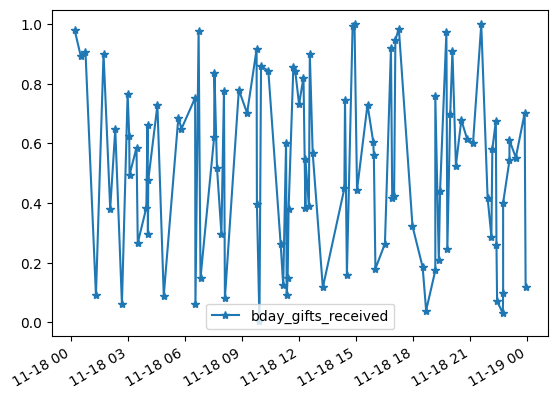

In [3]:
t = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')
timestamp = np.random.choice(t, size=100)
timestamp
values = np.random.random(100)
gift_df = pd.DataFrame({'bday_gifts_received': values}, index=timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(marker='*', linestyle='-')

In [4]:
gift_df.index.diff()

TimedeltaIndex([              NaT, '0 days 00:19:00', '0 days 00:15:00',
                '0 days 00:33:00', '0 days 00:24:00', '0 days 00:21:00',
                '0 days 00:16:00', '0 days 00:21:00', '0 days 00:18:00',
                '0 days 00:05:00', '0 days 00:01:00', '0 days 00:22:00',
                '0 days 00:04:00', '0 days 00:27:00', '0 days 00:04:00',
                '0 days 00:01:00', '0 days 00:01:00', '0 days 00:29:00',
                '0 days 00:20:00', '0 days 00:46:00', '0 days 00:10:00',
                '0 days 00:43:00', '0 days 00:01:00', '0 days 00:10:00',
                '0 days 00:06:00', '0 days 00:43:00', '0 days 00:01:00',
                '0 days 00:08:00', '0 days 00:14:00', '0 days 00:08:00',
                '0 days 00:03:00', '0 days 00:44:00', '0 days 00:26:00',
                '0 days 00:30:00', '0 days 00:01:00', '0 days 00:08:00',
                '0 days 00:05:00', '0 days 00:23:00', '0 days 00:39:00',
                '0 days 00:08:00', '0 days 00:09:00

In [5]:
gift_df['time_diff'] = gift_df.index.diff()
gift_df['time_diff'] = gift_df.time_diff.apply(lambda dt: dt.total_seconds()).fillna(0)
gift_df

,bday_gifts_received,time_diff
1999-11-18 00:12:00,0.979608,0.0
1999-11-18 00:31:00,0.893205,1140.0
1999-11-18 00:46:00,0.907522,900.0
1999-11-18 01:19:00,0.089997,1980.0
1999-11-18 01:43:00,0.901323,1440.0
...,...,...
1999-11-18 23:04:00,0.543175,1200.0
1999-11-18 23:04:00,0.610944,0.0
1999-11-18 23:24:00,0.552396,1200.0
1999-11-18 23:52:00,0.701721,1680.0


,bday_gifts_received,time_diff
bday_gifts_received,1.000000,0.086047
time_diff,0.086047,1.000000


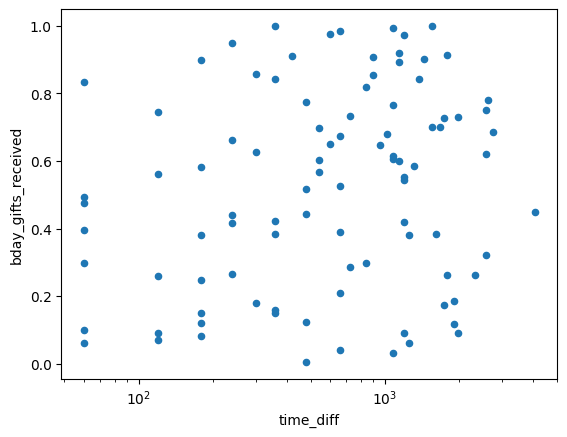

In [6]:
ax = gift_df.plot.scatter('time_diff', 'bday_gifts_received')
ax.set_xscale('log')
gift_df.corr()

In [7]:
# determine number of events by hour
gifts_hr = gift_df.drop('time_diff', axis=1).groupby(lambda x: x.hour).count()
gifts_hr

,bday_gifts_received
0,3
1,2
2,4
3,5
4,5
5,2
6,4
7,4
8,3
9,4


<Axes: >

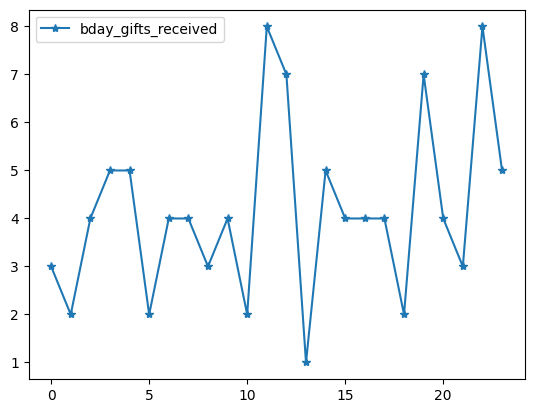

In [8]:
gifts_hr.plot(marker='*', linestyle='-', use_index=True)

In [17]:
avg_likeness = gift_df.drop('time_diff', axis=1).groupby(lambda x: x.hour).mean()
avg_likeness = avg_likeness.rename(columns={"bday_gifts_received": "avg_likeness"})
avg_likeness

,avg_likeness
0,0.926778
1,0.495660
2,0.464250
3,0.471158
4,0.450592
5,0.667588
6,0.484734
7,0.567630
8,0.544810
9,0.504384


<Axes: >

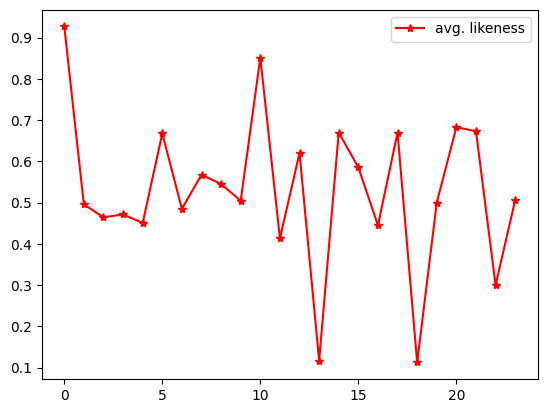

In [10]:
avg_likeness.plot(marker='*', linestyle='-', color='r', use_index=True)

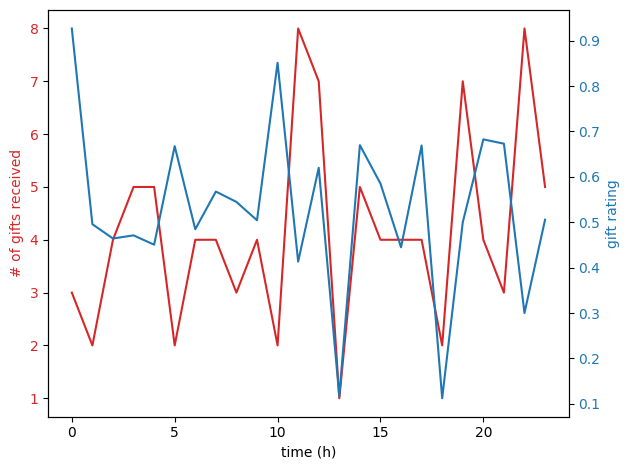

In [18]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (h)')
ax1.set_ylabel('# of gifts received', color=color)
ax1.plot(gifts_hr.index, gifts_hr['bday_gifts_received'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('gift rating', color=color)  # we already handled the x-label with ax1
ax2.plot(avg_likeness.index, avg_likeness['avg_likeness'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Axes: >

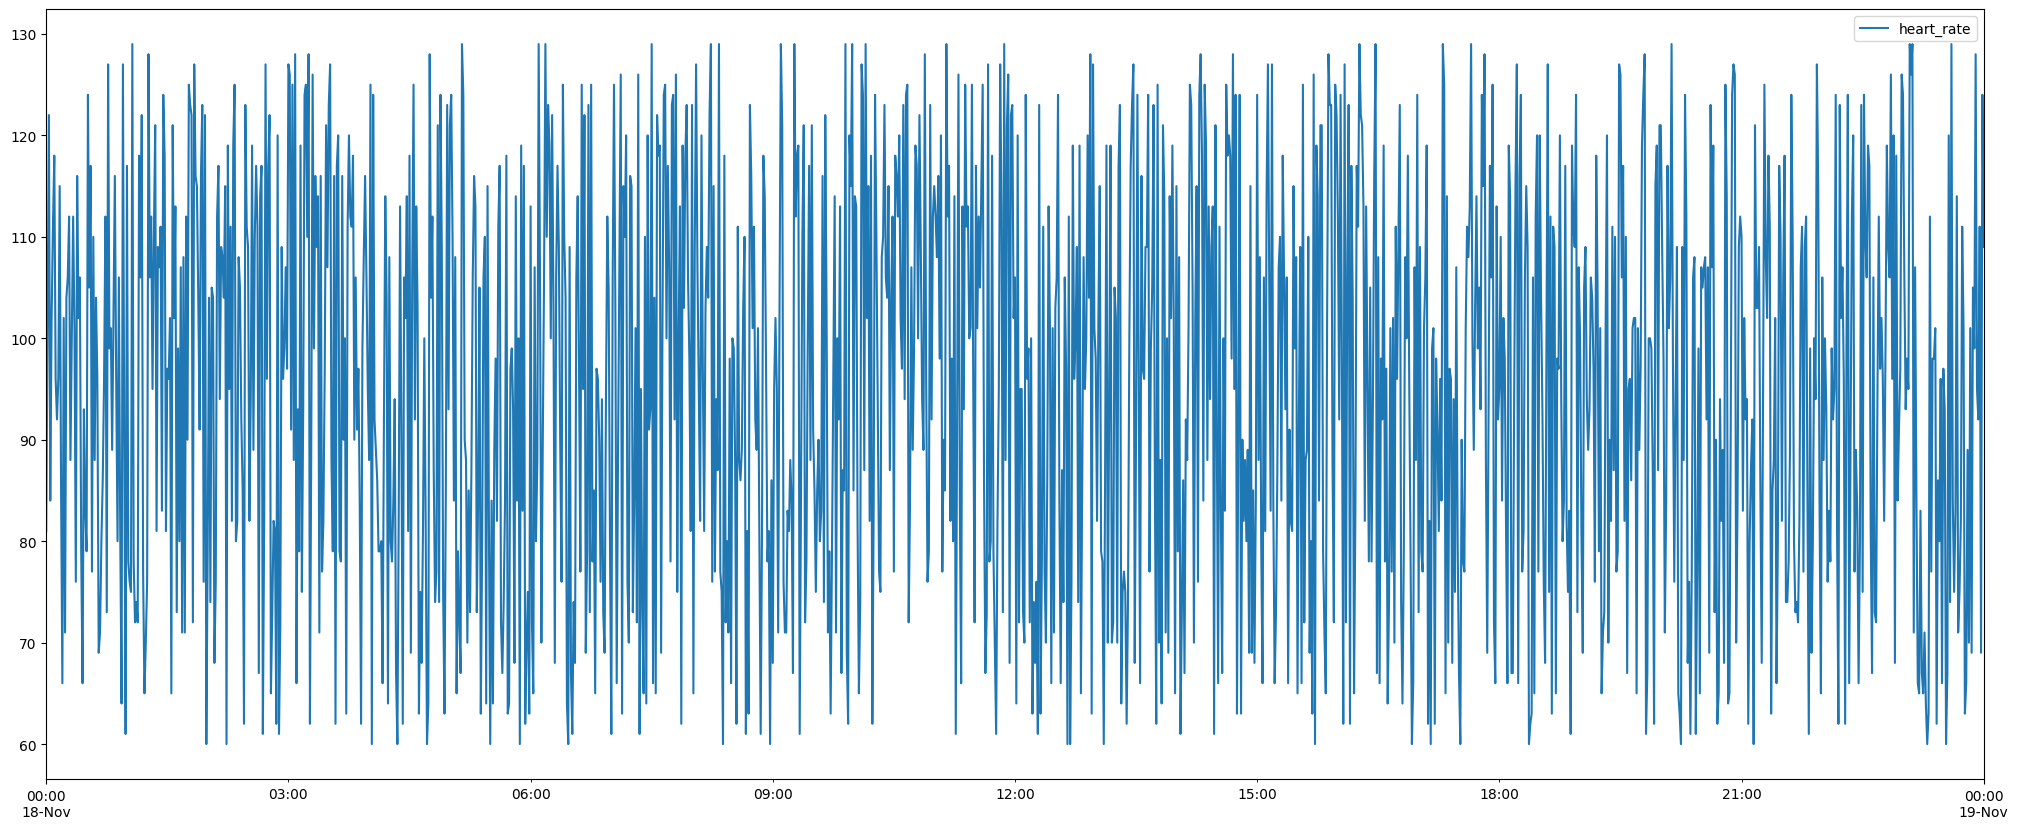

In [12]:
# generate heart rate time series data
# heart rate value for each minute of the day

hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=t)
hr_df.sort_index(inplace=True)
hr_df.plot(linestyle='-', figsize=[25,10])

    avg_heart_rate
0        95.459016
1        98.166667
2        96.433333
3       101.133333
4        90.533333
5        89.066667
6        94.300000
7        98.400000
8        93.316667
9        93.016667
10      102.100000
11      100.216667
12       90.950000
13       93.766667
14       96.166667
15       95.933333
16       96.066667
17       94.083333
18       94.233333
19       95.333333
20       93.500000
21       92.483333
22       96.450000
23       89.316667


<Axes: >

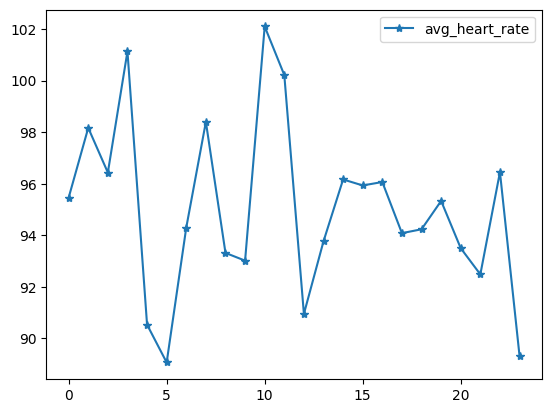

In [13]:
hourly_mean_hr = hr_df.groupby(lambda x: x.hour).mean().rename(columns={"heart_rate": "avg_heart_rate"})
print(hourly_mean_hr)
hourly_mean_hr.plot(marker='*', linestyle='-')

In [19]:
# combine no. of gifts per hour, avg likeness per hour, and avg heart rate per hour data

hr_window_timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-18 23:00:00', freq='1h')

hr_window_df = pd.DataFrame({'no_of_gifts': gifts_hr['bday_gifts_received'].tolist(),
                                'avg_likeness': avg_likeness['avg_likeness'].tolist(),
                                'avg_heart_rate': hourly_mean_hr['avg_heart_rate'].tolist()}, 
                                index=hr_window_timestamp)

hr_window_df

,no_of_gifts,avg_likeness,avg_heart_rate
1999-11-18 00:00:00,3,0.926778,95.459016
1999-11-18 01:00:00,2,0.495660,98.166667
1999-11-18 02:00:00,4,0.464250,96.433333
1999-11-18 03:00:00,5,0.471158,101.133333
1999-11-18 04:00:00,5,0.450592,90.533333
1999-11-18 05:00:00,2,0.667588,89.066667
1999-11-18 06:00:00,4,0.484734,94.300000
1999-11-18 07:00:00,4,0.567630,98.400000
1999-11-18 08:00:00,3,0.544810,93.316667
1999-11-18 09:00:00,4,0.504384,93.016667


In [20]:
# window by time periods in between events?

# hr_by_event = hr_df.groupby(gift_df.index).mean()

In [31]:
# working version of EventSeries class

class EventSeries:
    def __init__(self, data):
        self.data = data.sort_index()
        self.event_time_data_windows = {}

    # for adding more event entries (rows)
    def __add__(self, events):
        self.data = self.data.concat(events, ignore_index=True)

    # add column of data to the existing events
    def add_columns(self, col, col_name):
        # col should be a list of data values
        self.data.loc[:, col_name] = col

    def add_time_series(self, ts, period, agg_func_name, window_name, period_num=1, es_cols_drop=[]):
        # ts is TimeSeries object
        # period_num is amount of time period (for example 2 hours) 
        # period is unit of time (i.e. 'hour') or eventually possibly custom list of time ranges
        # agg_func can be mean(), median(), count(), etc.
        ts_window = ts.data.groupby(lambda x: getattr(x, period) // period_num)
        if agg_func_name == 'mean':
            ts_window = ts_window.mean()
        elif agg_func_name == 'median':
            ts_window = ts_window.median()
        elif agg_func_name == 'max':
            ts_window = ts_window.max()
        elif agg_func_name == 'min':
            ts_window = ts_window.min()
        elif agg_func_name == 'sum':
            ts_window = ts_window.sum()
        elif agg_func_name == 'count':
            ts_window = ts_window.count()
        else:
            raise ValueError('The agg_func_name inputted is not supported.')
        '''
        if period == 'year':
            ts_window = ts.data.groupby(lambda x: x.year() // period_num, agg_func)
        elif period == 'month':
            ts_window = ts.data.groupby(lambda x: x.month() // period_num, agg_func)
        elif period == 'day':
            ts_window = ts.data.groupby(lambda x: x.day() // period_num, agg_func)
        elif period == 'hour':
            ts_window = ts.data.groupby(lambda x: x.hour() // period_num, agg_func)
        elif period == 'minute':
            ts_window = ts.data.groupby(lambda x: x.minute() // period_num, agg_func)
        elif period == 'second':
            ts_window = ts.data.groupby(lambda x: x.second() // period_num, agg_func)
        else:
            raise ValueError('The time period is not valid.')
        '''
        es_window = self.window(period, cols_to_drop=es_cols_drop)
        self.event_time_data_windows[window_name] = [es_window, ts_window]

    # for windowing event series according to certain periods
    # number of events per time period specified
    def window(self, period, period_num=1, cols_to_drop=[]):
        edited_data = self.data.drop(cols_to_drop, axis=1)
        return((edited_data.groupby(lambda x: getattr(x, period) // period_num)).count())
        '''
        if period == 'year':
            return(edited_data.groupby(lambda x: x.year()).count())
        elif period == 'month':
            return(edited_data.groupby(lambda x: x.month()).count())
        elif period == 'day':
            return(edited_data.groupby(lambda x: x.day()).count())
        elif period == 'hour':
            return(edited_data.groupby(lambda x: x.hour()).count())
        elif period == 'minute':
            return(edited_data.groupby(lambda x: x.minute()).count())
        else:
            raise ValueError('The time period is not valid.')
        '''

    # function for returning aggregate stats of a certain data column over time?
        # i.e. average likeness for every hr
    
    # def describe(self):
        # output number of events, mean, median, mode, min, and max values for each column of data 
    
    # def plot_event_series(self, marker, linestyle=None, title=''):
        # self.data = self.data.sort_index(inplace=True)
        # self.data.plot(marker=marker, linestyle=linestyle)

    def plot_event_time_data_window(self, name, xlabel, ylabel_es, ylabel_ts, title=''):
        # based on code from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
        fig, ax1 = plt.subplots()
        # plot the event series data
        color = 'tab:red'
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel_es, color=color)
        ax1.plot(self.event_time_data_windows[name][0].index, self.event_time_data_windows[name][0].loc[:, ylabel_es], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        
        # plot the time series data
        ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel(ylabel_ts, color=color)  # we already handled the x-label with ax1
        ax2.plot(self.event_time_data_windows[name][1].index, self.event_time_data_windows[name][1].loc[:, ylabel_ts], color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title(title)
        plt.show()


In [32]:
class TimeSeries:
    def __init__(self, data, agg_func=None):
        self.data = data
        self.agg_func = agg_func

    def __add__(self, other):
        if isinstance(other, TimeSeries):
            ts1 = TimeSeries(self.data, self.agg_func)
            ts2 = other
            tf = TimeFrame(ts1) + TimeFrame(ts2)
            return tf
        else:
            raise ValueError('You can only add TimeSeries objects to TimeSeries objects.')

    def window(self, freq):
        return self.data.groupby(pd.Grouper(freq=freq)).apply(self.agg_func)

    def apply(self):
        raise NotImplementedError('TODO!')

In [33]:
# initial test of event series class

es = EventSeries(gift_df)
hr_ts = TimeSeries(hr_df)
es.add_time_series(hr_ts, 'hour', 'mean', 'heart_rate_data', es_cols_drop=['time_diff'])

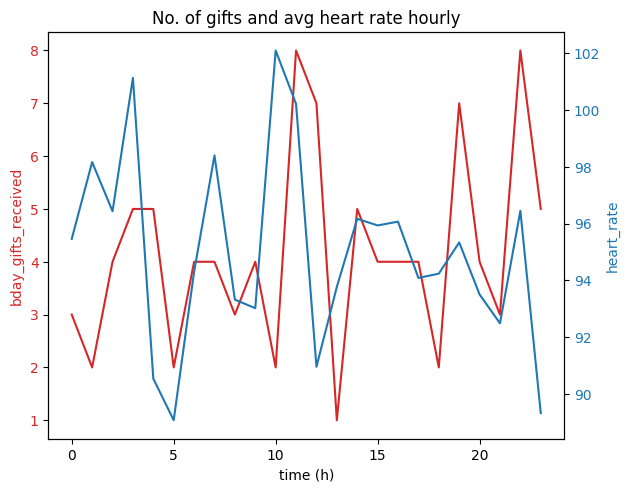

In [34]:
# test plotting an event-time data window

es.plot_event_time_data_window('heart_rate_data', 'time (h)', 'bday_gifts_received', 'heart_rate', title='No. of gifts and avg heart rate hourly')

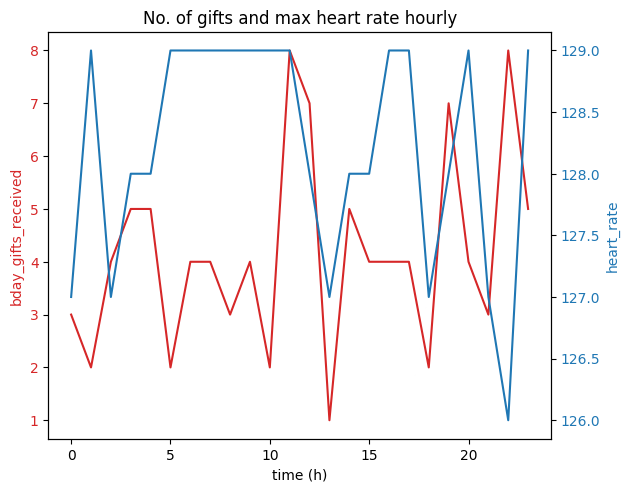

In [36]:
es.add_time_series(hr_ts, 'hour', 'max', 'heart_rate_data', es_cols_drop=['time_diff'])
es.plot_event_time_data_window('heart_rate_data', 'time (h)', 'bday_gifts_received', 'heart_rate', title='No. of gifts and max heart rate hourly')